# Fasion MNIST classification using CNN
## Tensorflwo version

# Installing and Importing Dependencies

In [ ]:
!pip install -U tensorflow_datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.3 MB 6.9 MB/s 
  Attempting uninstall: tensorflow-datasets
    Found existing installation: tensorflow-datasets 4.0.1
    Uninstalling tensorflow-datasets-4.0.1:
      Successfully uninstalled tensorflow-datasets-4.0.1


In [ ]:
import tensorflow as tf
import math
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

In [ ]:
import logging 
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

# Importing Dataset

In [ ]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Dataset fashion_mnist downloaded and prepared to ~/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


## Exploring the data

In [ ]:
class_names = metadata.features['label'].names
print("Class names:")
for i,j in enumerate(class_names):
  print(i,j)

num_train = metadata.splits['train'].num_examples
num_test = metadata.splits['test'].num_examples
print("\nNumber of training examples: {}".format(num_train))
print("Number of test examples: {}".format(num_test))

Class names:
0 T-shirt/top
1 Trouser
2 Pullover
3 Dress
4 Coat
5 Sandal
6 Shirt
7 Sneaker
8 Bag
9 Ankle boot

Number of training examples: 60000
Number of test examples: 10000


### Preprocessing the data

In [ ]:
#Each pixel in the image is an integer in range 0 - 255, we normalize it to the range 0 - 1 for the model to work properly
def norm(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

train_dataset = train_dataset.map(norm)
test_dataset = test_dataset.map(norm)

Caching the dataset will keep it in memory 

In [ ]:
train_dataset = train_dataset.cache()
test_dataset = test_dataset.cache()

## Exploring the processed data

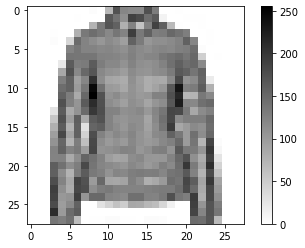

In [ ]:
for image, label in test_dataset.take(1):
  break
image = image.numpy().reshape((28,28))

plt.figure()
plt.imshow(image, cmap= plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

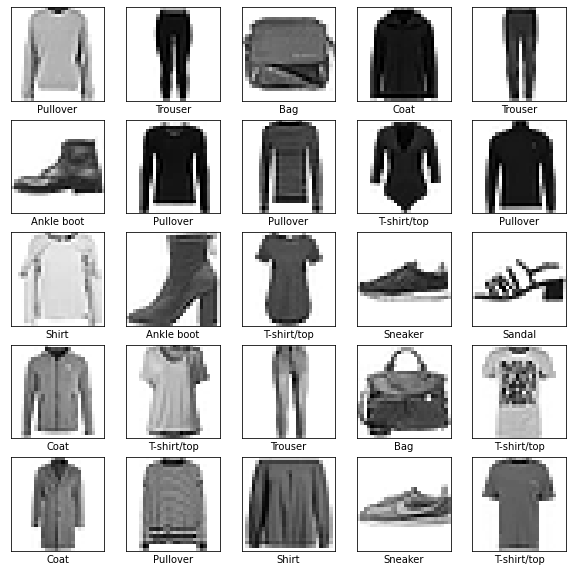

In [ ]:
plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(train_dataset.take(25)):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
plt.show()

## Defining the neural network

In [ ]:
model = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu, input_shape=(28,28,1)),
                             tf.keras.layers.MaxPooling2D((2,2), strides=2),
                             tf.keras.layers.Conv2D(64, (3,3), padding='same', activation=tf.nn.relu),
                             tf.keras.layers.MaxPooling2D((2,2),strides=2),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(128, activation=tf.nn.relu),
                             tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

## Compiling the model

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

## Training the model

In [ ]:
Batch_size = 32
train_dataset = train_dataset.cache().repeat().shuffle(num_train).batch(Batch_size)
test_dataset = test_dataset.cache().batch(Batch_size)

In [ ]:
model.fit (train_dataset, epochs=20, steps_per_epoch=math.ceil(num_train/Batch_size))

Epoch 1/20
1875/1875 [==============================] - 21s 3ms/step - loss: 0.5778 - accuracy: 0.8506
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2815 - accuracy: 0.8970
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2396 - accuracy: 0.9130
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2194 - accuracy: 0.9186
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1942 - accuracy: 0.9269
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1749 - accuracy: 0.9347
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1634 - accuracy: 0.9397
Epoch 8/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1443 - accuracy: 0.9470
Epoch 9/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1324 - accuracy: 0.9504
Epoch 10/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.12

## Evaluation

In [ ]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test/Batch_size))
print('Accuracy on test dataset: {}'.format(test_accuracy))

313/313 [==============================] - 1s 4ms/step - loss: 0.6758 - accuracy: 0.9076
Accuracy on test dataset: 0.9075999855995178


## Prediction

In [ ]:
for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)

In [ ]:
predictions.shape

(32, 10)

In [ ]:
predictions[0]

array([2.3065103e-13, 3.4351861e-30, 1.1198360e-04, 1.5538819e-13,
       9.9456114e-01, 2.4369770e-33, 5.3268485e-03, 2.2478294e-29,
       9.0051369e-19, 1.1459066e-25], dtype=float32)

In [ ]:
np.argmax(predictions[0])

4

In [ ]:
test_labels[0]

4

In [ ]:
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

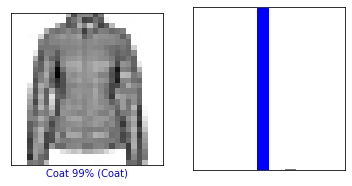

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

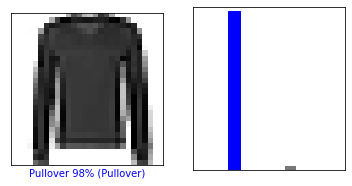

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

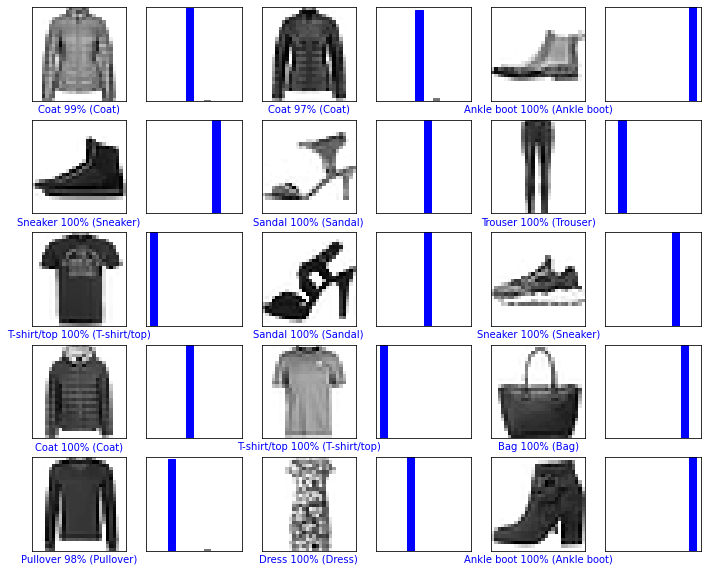

In [ ]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)


In [ ]:
img = test_images[0]

print(img.shape)

(28, 28, 1)


In [ ]:
img = np.array([img])

print(img.shape)

(1, 28, 28, 1)


In [ ]:
predictions_single = model.predict(img)

print(predictions_single)

[[2.30652330e-13 3.43508113e-30 1.11984125e-04 1.55391122e-13
  9.94561017e-01 2.43712544e-33 5.32698026e-03 2.24800065e-29
  9.00544502e-19 1.14597651e-25]]


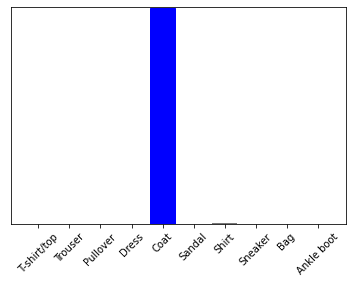

In [ ]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [ ]:
np.argmax(predictions_single[0])

4